# Initialization

## Loading Packages

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [99]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

## Loading Dataset

In [100]:
df1 = pd.read_csv("/content/sample_data/california_housing_train.csv")
df2 = pd.read_csv("/content/sample_data/california_housing_test.csv")

# EDA

In [101]:
df = pd.concat([df1, df2], axis=0)

In [102]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [103]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [104]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

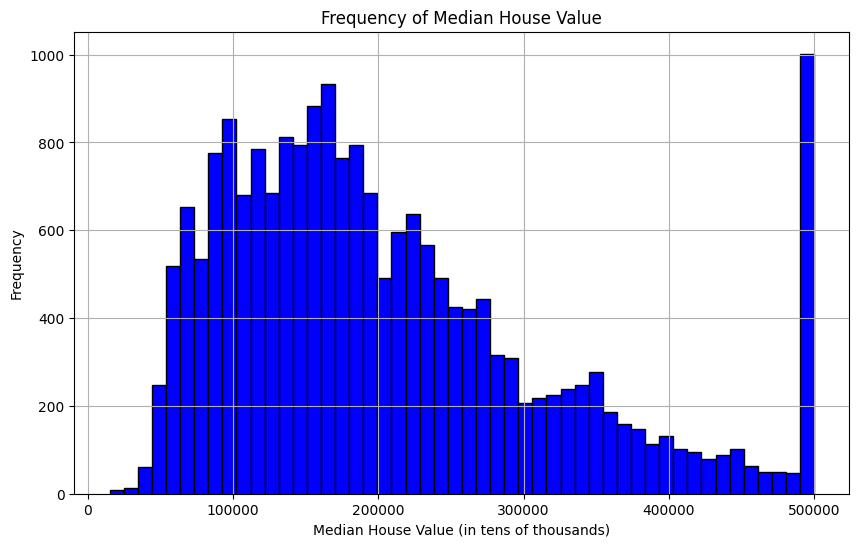

In [105]:
plt.figure(figsize=(10, 6))
plt.hist(df["median_house_value"].values, bins=50, color='blue', edgecolor='black')
plt.title('Frequency of Median House Value')
plt.xlabel('Median House Value (in tens of thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Preprocessing

## Splitting Dependent and Independent Variables

In [106]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Handling Missing Value

In [107]:
# no missing value

## Categorical Data to Digital Data

In [108]:
# no categorical data

## Splitting Training and Testing Data

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [110]:
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# NN

## Building NN

In [111]:
class NeuralNetwork(nn.Module):
  """Define the structure of my neural network"""
  def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
      super(NeuralNetwork, self).__init__()
      self.fc1 = nn.Linear(input_size, hidden_size1)  # 第1隱藏層
      self.relu = nn.ReLU()  # ReLU激活函數
      self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # 第2隱藏層
      self.fc3 = nn.Linear(hidden_size2, output_size)  # 輸出層

  def forward(self, x):
      out = self.fc1(x)
      out = self.relu(out)
      out = self.fc2(out)
      out = self.relu(out)
      out = self.fc3(out)
      return out

## Setting Hyperparameter

In [112]:
X.shape

(20000, 8)

In [113]:
# 這邊可以做實驗，針對Hidden Layer神經元個數下去定義自己的公式

input_size = X.shape[1]  # Number of neurons in the input layer
hidden_size1 = 20  # Number of neurons in the first hidden layer
hidden_size2 = 10  # Number of neurons in the second hidden layer
output_size = 1  # Number of neurons in the output layer

## Create a NN instance

In [114]:
net = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [115]:
# # you can set the weight initializer here
# # custom initialization
# def weights_init(m):
#     if isinstance(m, nn.Linear):
#         nn.init.xavier_normal_(m.weight)
#         nn.init.zeros_(m.bias)  # or you could use a small constant value like 0.1

# # Apply the initialization to each layer of the network
# net.apply(weights_init)

## Setting Optimizer and Loss Function

In [116]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_fn = nn.MSELoss()  # Mean squared error loss

## Training

In [117]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

In [118]:
train_size = int(0.8 * len(X_train))
val_size = len(X_train) - train_size

In [119]:
# Create a DataLoader for your training data
train_dataset = TensorDataset(X_train, y_train)
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [120]:
# Define epoch
num_epochs = 100

In [121]:
train_losses = []  # list to store loss values
val_losses = []

train_preds = []
val_preds = []

for epoch in range(num_epochs):

    # training phase
    net.train()
    train_loss = 0
    for data in train_loader: # a batch
        inputs, labels = data
        optimizer.zero_grad()  # Zero the gradient buffers
        outputs = net(inputs)  # Get network outputs (forward propagation)
        loss = loss_fn(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagate the loss (backward propagation)
        optimizer.step()  # Update the weights

        train_loss += loss.item()  # accumulate loss per batch
        train_preds += outputs

    train_loss /= len(train_loader)  # average loss for the epoch
    train_losses.append(train_loss)  # store average loss for the epoch

    # validation phase
    net.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = net(data) # forward propagation
            loss = loss_fn(outputs, target)

            val_loss += loss.item()
            val_preds += outputs

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

    # Print loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Valiation Loss: {val_loss}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Train Loss: 56197623244.8, Valiation Loss: 55898745569.28
Epoch 2/100, Train Loss: 56094892656.64, Valiation Loss: 55688707645.44
Epoch 3/100, Train Loss: 55726887680.0, Valiation Loss: 55149065666.56
Epoch 4/100, Train Loss: 54985511649.28, Valiation Loss: 54204811448.32
Epoch 5/100, Train Loss: 53821721850.88, Valiation Loss: 52832588718.08
Epoch 6/100, Train Loss: 52221554201.6, Valiation Loss: 51020166410.24
Epoch 7/100, Train Loss: 50193423749.12, Valiation Loss: 48794960015.36
Epoch 8/100, Train Loss: 47804272143.36, Valiation Loss: 46239015321.6
Epoch 9/100, Train Loss: 45083862917.12, Valiation Loss: 43410518056.96
Epoch 10/100, Train Loss: 42181260175.36, Valiation Loss: 40375698964.48
Epoch 11/100, Train Loss: 39129918080.0, Valiation Loss: 37260307456.0
Epoch 12/100, Train Loss: 36062710609.92, Valiation Loss: 34197560913.92
Epoch 13/100, Train Loss: 33107166515.2, Valiation Loss: 31195839528.96
Epoch 14/100, Train Loss: 30350877552.64, Valiation Loss: 285796028

In [122]:
import math

thres = 13600000000
min_loss_earliest = 0
min_loss_earliest_index = 0

for i,loss in enumerate(val_losses):
  if loss < thres:
    min_loss_earliest = loss
    min_loss_earliest_index = i
    break

print(min_loss_earliest, min_loss_earliest_index)

13594356331.52 64


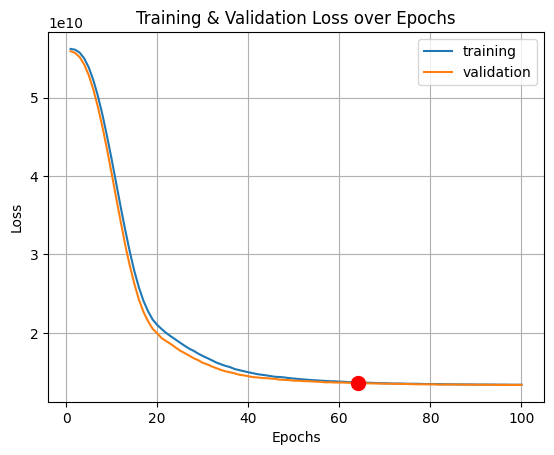

In [123]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label="training")
plt.plot(range(1, num_epochs+1), val_losses, label="validation")
plt.plot(min_loss_earliest_index, min_loss_earliest, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")

plt.title('Training & Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# we can choose only 60 epochs

# Testing

In [124]:
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [125]:
# Create a DataLoader for your testing data
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [126]:
# Set the model to evaluation mode
net.eval()

NeuralNetwork(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)

In [127]:
# Variables to hold predictions and labels
all_preds = []
all_labels = []

# No need to track gradients for evaluation
with torch.no_grad():
  for data in test_loader:
      inputs, labels = data
      outputs = net(inputs)  # Get network outputs
      all_preds.append(outputs.numpy())
      all_labels.append(labels.numpy())

In [128]:
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

In [129]:
df = pd.DataFrame({
    "pred": all_preds.reshape(-1),
    "ground_truth": all_labels
})

df

,pred,ground_truth
0,212482.828125,262300.0
1,205811.546875,296600.0
2,216705.781250,14999.0
3,202425.359375,315000.0
4,209745.765625,212500.0
...,...,...
3995,231339.843750,83800.0
3996,205324.640625,114600.0
3997,208587.687500,458600.0
3998,207622.171875,500001.0


In [130]:
# Optionally, calculate some metrics
# For example, mean squared error (assuming regression problem)
mse = np.mean((all_preds - all_labels)**2)
print(f'Mean Squared Error: {mse}') # square value

Mean Squared Error: 13443475456.0


# Experiment
Possible Metrics:
1. time
2. loss
3. converge epochs

In [131]:
def emperical_rule(N_s, N_i, N_o, alpha):
  """https://eulertech.wordpress.com/2018/01/02/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-network/"""
  return int((N_s)/(alpha*(N_i+N_o)))

In [132]:
def my_hidden_neuron_size(N_s, N_i, N_i_pre, N_o, alpha):
  """Determine the numbers of hidden layers' neuron"""
  """
  1. 越多features可能需要越多的neuron來捕捉資訊 => N_i(第一層的), N_s
  2. 我們想要越後面，neuron數越小，以避免在output layer前一層數量太多，只經過linear就輸出結果 => N_i, N_o => moving average
  """
  return int(N_s / ( (alpha)*(N_i+N_o) + (1-alpha)*(N_i_pre) ))

  # a*(N_i+N_o) + (1-a)*(0) = h1
  # a*(h1+N_o) + (1-a)(a*(N_i+N_o) + (1-a)*(0)) = h2

## My neron numbers formula

In [133]:
N_s = len(X_train)

input_size = X.shape[1]
output_size = 1
alpha = 5

hidden_size1 = my_hidden_neuron_size(N_s, input_size, 0, output_size, alpha)
hidden_size2 = my_hidden_neuron_size(N_s, hidden_size1, input_size, output_size, alpha)

In [134]:
new_model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [135]:
optimizer = optim.Adam(new_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()  # Mean squared error loss

In [136]:
train_losses = []
val_losses = []

train_preds = []
val_preds = []

for epoch in range(num_epochs):

    # training phase
    new_model.train()
    train_loss = 0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = new_model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_preds += outputs

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # validation phase
    new_model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = new_model(data) # forward propagation
            loss = loss_fn(outputs, target)

            val_loss += loss.item()
            val_preds += outputs

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

    # Print loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Valiation Loss: {val_loss}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Train Loss: 56042092830.72, Valiation Loss: 55285829652.48
Epoch 2/100, Train Loss: 53758535936.0, Valiation Loss: 50997174968.32
Epoch 3/100, Train Loss: 47037517470.72, Valiation Loss: 42246335877.12
Epoch 4/100, Train Loss: 37269058478.08, Valiation Loss: 31933925109.76
Epoch 5/100, Train Loss: 27997943452.16, Valiation Loss: 23596420157.44
Epoch 6/100, Train Loss: 21722601697.28, Valiation Loss: 18963298083.84
Epoch 7/100, Train Loss: 18777755372.8, Valiation Loss: 17308216135.68
Epoch 8/100, Train Loss: 17561416517.12, Valiation Loss: 16528888115.2
Epoch 9/100, Train Loss: 16870157107.2, Valiation Loss: 15988299008.0
Epoch 10/100, Train Loss: 16324569428.48, Valiation Loss: 15610159006.72
Epoch 11/100, Train Loss: 15845555723.52, Valiation Loss: 15251803136.0
Epoch 12/100, Train Loss: 15454554257.92, Valiation Loss: 14947260272.64
Epoch 13/100, Train Loss: 15142786208.0, Valiation Loss: 14701288975.36
Epoch 14/100, Train Loss: 14914400706.56, Valiation Loss: 144583654

In [137]:
import math

thres = 13600000000
min_loss_earliest = 0
min_loss_earliest_index = 0

for i,loss in enumerate(val_losses):
  if loss < thres:
    min_loss_earliest = loss
    min_loss_earliest_index = i
    break

print(min_loss_earliest, min_loss_earliest_index)

13599980800.0 24


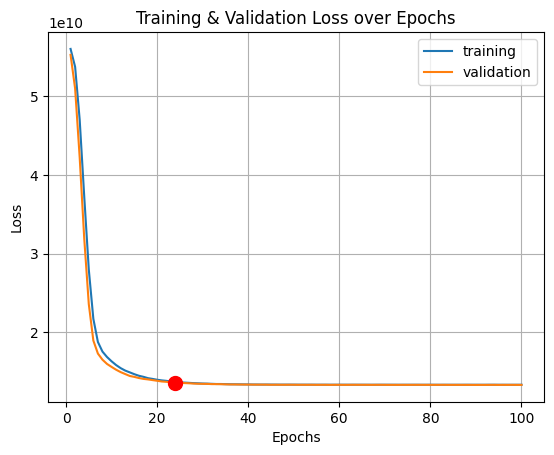

In [138]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label="training")
plt.plot(range(1, num_epochs+1), val_losses, label="validation")
plt.plot(min_loss_earliest_index, min_loss_earliest, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")

plt.title('Training & Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# This formula makes the NN converge more quickly

## Emperical

In [139]:
N_s = len(X_train)

input_size = X.shape[1]
output_size = 1
alpha = 5

hidden_size1 = emperical_rule(N_s, input_size, output_size, alpha)
hidden_size2 = emperical_rule(N_s, hidden_size1, output_size, alpha)

In [140]:
new_model2 = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [141]:
optimizer = optim.Adam(new_model2.parameters(), lr=0.001)
loss_fn = nn.MSELoss()  # Mean squared error loss

In [142]:
train_losses = []
val_losses = []

train_preds = []
val_preds = []

for epoch in range(num_epochs):

    # training phase
    new_model2.train()
    train_loss = 0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = new_model2(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_preds += outputs

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # validation phase
    new_model2.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = new_model2(data) # forward propagation
            loss = loss_fn(outputs, target)

            val_loss += loss.item()
            val_preds += outputs

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

    # Print loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Valiation Loss: {val_loss}')

Epoch 1/100, Train Loss: 56065435827.2, Valiation Loss: 55385632235.52
Epoch 2/100, Train Loss: 54197918909.44, Valiation Loss: 51884264980.48
Epoch 3/100, Train Loss: 48583643668.48, Valiation Loss: 44411196129.28
Epoch 4/100, Train Loss: 39883059555.84, Valiation Loss: 34899739299.84
Epoch 5/100, Train Loss: 30951937387.52, Valiation Loss: 26428457400.32
Epoch 6/100, Train Loss: 24025270850.56, Valiation Loss: 20723835637.76
Epoch 7/100, Train Loss: 20018408135.68, Valiation Loss: 18119415966.72
Epoch 8/100, Train Loss: 18314479866.88, Valiation Loss: 17036444088.32
Epoch 9/100, Train Loss: 17416055264.0, Valiation Loss: 16373896053.76
Epoch 10/100, Train Loss: 16764339575.04, Valiation Loss: 15957746472.96
Epoch 11/100, Train Loss: 16294583490.56, Valiation Loss: 15497423467.52
Epoch 12/100, Train Loss: 15871576174.08, Valiation Loss: 15189858191.36
Epoch 13/100, Train Loss: 15453557712.64, Valiation Loss: 14896908672.0
Epoch 14/100, Train Loss: 15154307208.96, Valiation Loss: 14742

In [143]:
import math

thres = 13600000000
min_loss_earliest = 0
min_loss_earliest_index = 0

for i,loss in enumerate(val_losses):
  if loss < thres:
    min_loss_earliest = loss
    min_loss_earliest_index = i
    break

print(min_loss_earliest, min_loss_earliest_index)

13582647828.48 26


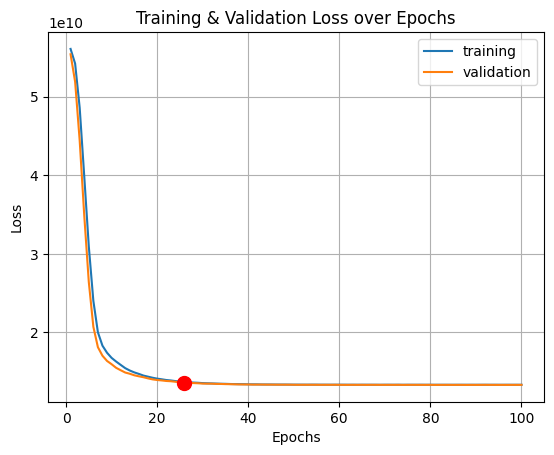

In [144]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label="training")
plt.plot(range(1, num_epochs+1), val_losses, label="validation")
plt.plot(min_loss_earliest_index, min_loss_earliest, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")

plt.title('Training & Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# It converge at about 25th epochs which is a little bit larger than our formula

In [145]:
new_model2.eval()

NeuralNetwork(
  (fc1): Linear(in_features=8, out_features=355, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=355, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

In [146]:
# Variables to hold predictions and labels
all_preds = []
all_labels = []

# No need to track gradients for evaluation
with torch.no_grad():
  for data in test_loader:
      inputs, labels = data
      outputs = new_model2(inputs)  # Get network outputs
      all_preds.append(outputs.numpy())
      all_labels.append(labels.numpy())

In [147]:
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

In [148]:
df = pd.DataFrame({
    "pred": all_preds.reshape(-1),
    "ground_truth": all_labels
})

df

,pred,ground_truth
0,207807.062500,262300.0
1,208732.437500,296600.0
2,203829.156250,14999.0
3,204294.906250,315000.0
4,209116.328125,212500.0
...,...,...
3995,207293.875000,83800.0
3996,207047.500000,114600.0
3997,210473.562500,458600.0
3998,209548.187500,500001.0
